# User Product Recomendation

pada notebook ini akan dibuat sebuah sistem rekomendasi untuk merekomendasi barang yang akan dibeli selanjutnya oleh user pada aplikasi marketplace Terra Store. Tujuan pembuatan sistem ini adalah meningkatkan market cap dari terra store agar semakin cepat menjadi UNICORN dan listing IDX di Indonesia!!!!

## Import Library
pada tahap pertama ini akan diimport beberapa library general yang dibutuhkan dalam implementasi sistem

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List

## Load Dataset
Selanjutnya akan diload beberapa dataset yang sudah disediakan oleh terra store

In [2]:
product = pd.read_csv("product_details.csv",delimiter=";")
purchase = pd.read_csv("purchase_history.csv",delimiter=";") 
interactions = pd.read_csv("customer_interactions.csv")

## Preprocessing, EDA, dan Feature Engineering
tahap selajutnya, kita akan melihat beberapa dataframe yang sudah kita load dan akan melakukan preprocessing, EDA, dan feature engineering.

### Product DataFrame

In [3]:
product.head()

,product_id,category,price,ratings,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,101,Electronics,500,4.5,NaN,NaN,NaN
1,102,Clothing,50,3.8,NaN,NaN,NaN
2,103,Home & Kitchen,200,4.2,NaN,NaN,NaN
3,104,Beauty,30,4.0,NaN,NaN,NaN
4,105,Electronics,800,4.8,NaN,NaN,NaN


In [5]:
product.drop(columns=product.columns[-3:],inplace=True)

In [6]:
product.isna().sum()

product_id    0
category      0
price         0
ratings       0
dtype: int64

In [7]:
product.describe()

,product_id,price,ratings
count,5.000000,5.000000,5.000000
mean,103.000000,316.000000,4.260000
std,1.581139,329.438917,0.397492
min,101.000000,30.000000,3.800000
25%,102.000000,50.000000,4.000000
50%,103.000000,200.000000,4.200000
75%,104.000000,500.000000,4.500000
max,105.000000,800.000000,4.800000


In [8]:
product.corr()

,product_id,price,ratings
product_id,1.000000,0.278370,0.318223
price,0.278370,1.000000,0.972131
ratings,0.318223,0.972131,1.000000


#### Pada datframe produk terdapat 3 column unmanned yang harus dihapus agar dataset kita menjadi lebih rapi. Selanjutnya dari sini didapat insight bahwa total rows pada dataframe product hanya sebanyak 5. Selain itu disini juga didapatkan bahwa ratings dan price memiliki korelasi yang tinggi

### Purchase DataFrame

In [9]:
purchase.head()

,customer_id,product_id,purchase_date,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,101,2023-01-01,NaN,NaN,NaN,NaN
1,1,105,2023-01-05,NaN,NaN,NaN,NaN
2,2,102,2023-01-02,NaN,NaN,NaN,NaN
3,3,103,2023-01-03,NaN,NaN,NaN,NaN
4,4,104,2023-01-04,NaN,NaN,NaN,NaN


In [11]:
purchase.drop(columns=purchase.columns[-4:],inplace=True)

In [12]:
purchase.isna().sum()

customer_id      0
product_id       0
purchase_date    0
dtype: int64

In [13]:
purchase.describe()

,customer_id,product_id
count,6.000000,6.000000
mean,2.666667,102.666667
std,1.632993,1.632993
min,1.000000,101.000000
25%,1.250000,101.250000
50%,2.500000,102.500000
75%,3.750000,103.750000
max,5.000000,105.000000


#### Dataframe purchase berisi data pembelian dari customer id tertentu terhadap produk dengan id tertentu. Terdapat 4 buah column unmanned yang harus dihilangkan. Selain itu terdapat juga tanggal pembelian customer. Total data pada dataframe ini adalah 6

### Interactions

In [14]:
interactions.head()

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110


In [15]:
interactions.isna().sum()

customer_id    0
page_views     0
time_spent     0
dtype: int64

In [16]:
interactions.describe()

,customer_id,page_views,time_spent
count,5.000000,5.00000,5.000000
mean,3.000000,22.40000,110.000000
std,1.581139,5.59464,27.386128
min,1.000000,15.00000,80.000000
25%,2.000000,20.00000,90.000000
50%,3.000000,22.00000,110.000000
75%,4.000000,25.00000,120.000000
max,5.000000,30.00000,150.000000


In [17]:
interactions.corr()

,customer_id,page_views,time_spent
customer_id,1.000000,-0.310878,-0.173205
page_views,-0.310878,1.000000,0.979013
time_spent,-0.173205,0.979013,1.000000


#### Pada interactions, dapat diketahui bahwa dataframe ini berisi data customer dengan id tertentu, halaman total yang dilihat, dan waktu yang dihabiskan oleh customer. Asumsi saya pada data ini, page_views dan time_spent merupakan data akumulasi dari seluruh kegiatan user dalam menggunakan aplikasi/website. Antara page_views dan time_spent memiliki korelasi yang cukup tinggi

### Spending Money by Customer
pada tahap ini kita akan melakukan EDA dengan melihat data siapa customer yang menghabiskan uang paling banyak.

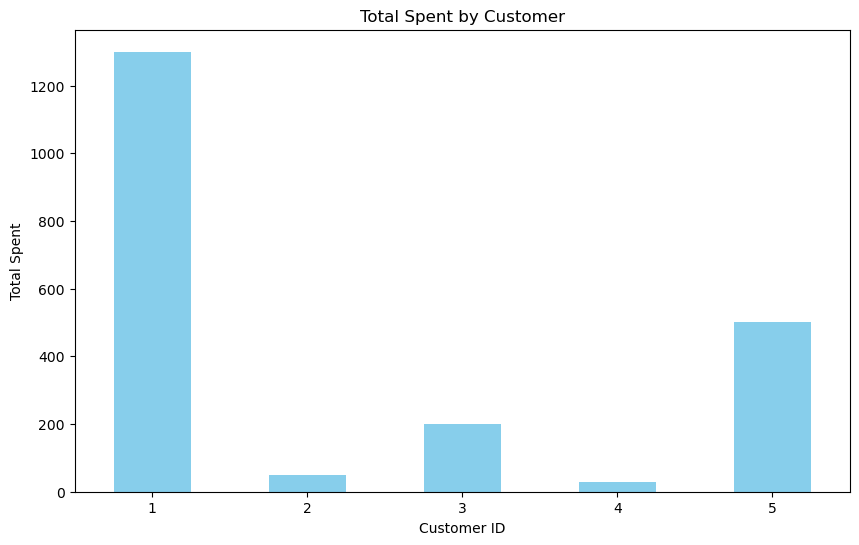

In [18]:
purchase_product = pd.merge(purchase,product,on="product_id")
customer_spent = purchase_product.groupby("customer_id")["price"].sum()
customer_spent.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Spent by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Spent')
plt.xticks(rotation=0)  
plt.show()

#### Dari data diatas terlihat bahwa customer 1 menghabiskan banyak uang untuk membeli produk dari terra store, disusul oleh customer 5, customer 3, customer 2, dan terakhir 4. Bisa kita asumsikan bahwa uang yang dimiliki oleh customer pertama lebih banyak dibandingkan dengan yang lain. 

### Average product ratings
Disini kita akan melihat rata-rata rating produk yang dibeli oleh customer. Dari data yang sebelumnya kita dapatkan, terlihat bahwa korelasi antara rating dan harga produk tinggi.

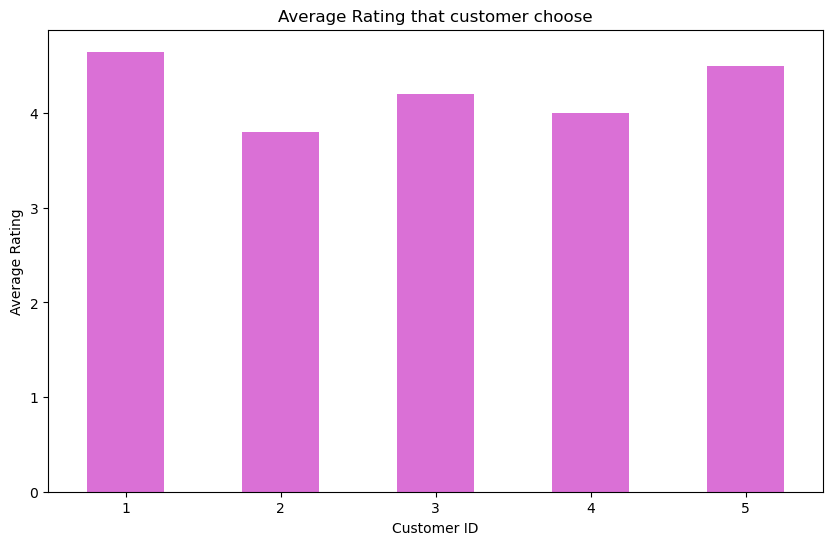

In [19]:
customer_ratings = purchase_product.groupby("customer_id")["ratings"].mean()
customer_ratings.plot(kind='bar', figsize=(10, 6), color='orchid')
plt.title('Average Rating that customer choose')
plt.xlabel('Customer ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=0) 
plt.show()

#### Dari sini dapat dilihat bahwa customer 1 membeli produk dengan rata-rata rating yang lebih tinggi dibandingkan dengan customer lainnya. 

### Jumlah produk berdasarkan kategori
selanjutnya akan dilihat jumlah produk berdasarkan kategori yang dibeli oleh tiap customer

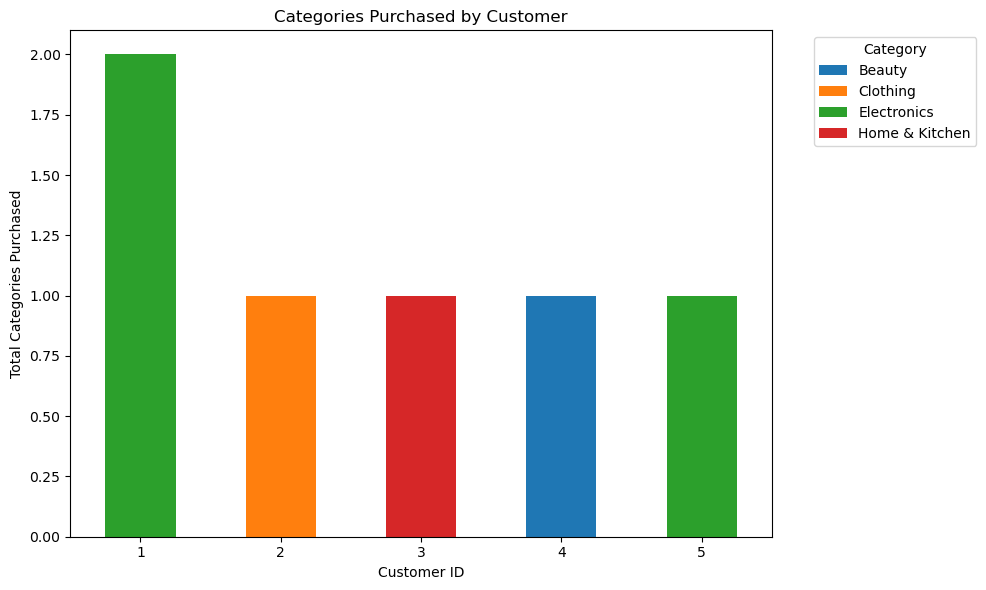

In [20]:
category_count = purchase_product.groupby(['customer_id', 'category']).size().unstack(fill_value=0)
category_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Categories Purchased by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Categories Purchased')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

#### dari data diatas dapat dilihat bahwa produk electronic yang paling diminati oleh banyak customer terbukti dengan 3 jumlah pembelian

### harga rata-rata tiap kategori produk
selanjutnya kita akan melihat harga rata-rata dari tiap kategori produk untuk mengetahui mengapa salah satu produk banyak diminati?

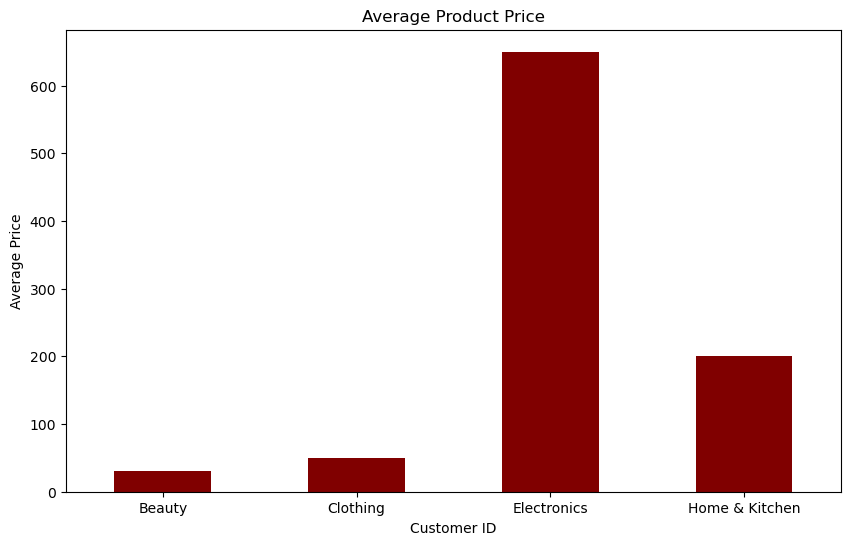

In [22]:
product_price_average = product.groupby("category")["price"].mean()
product_price_average.plot(kind='bar', figsize=(10, 6), color='maroon')
plt.title('Average Product Price')
plt.xlabel('Customer ID')
plt.ylabel('Average Price')
plt.xticks(rotation=0)  
plt.show()

#### ternyata dari sini electronics sebagai produk yang diminati, memiliki rata-rata harga yang paling tinggi dibandingkan produk lainnya. Sehingga asumsi mengenai pembelian electronics karena memiliki harga murah terpatahkan. Asumsi lain yang dapat timbul adalah kategori electronics sedang mengeluarkan produk terbaru sehingga penjualannya meningkat. Namun asusmsi ini tidak dapat menjadi tesis karena tidak dimilikinya data pendukung lainnya.

### interactions vs product
selanjutnya akan diselidiki apakah pembelian sebuah produk dipengaruhi oleh user interaksi dengan aplikasi?

In [23]:
interactions_product = interactions.copy()
interactions_product["average_ratings"] = customer_ratings.values
interactions_product["total_spent"] = customer_spent.values

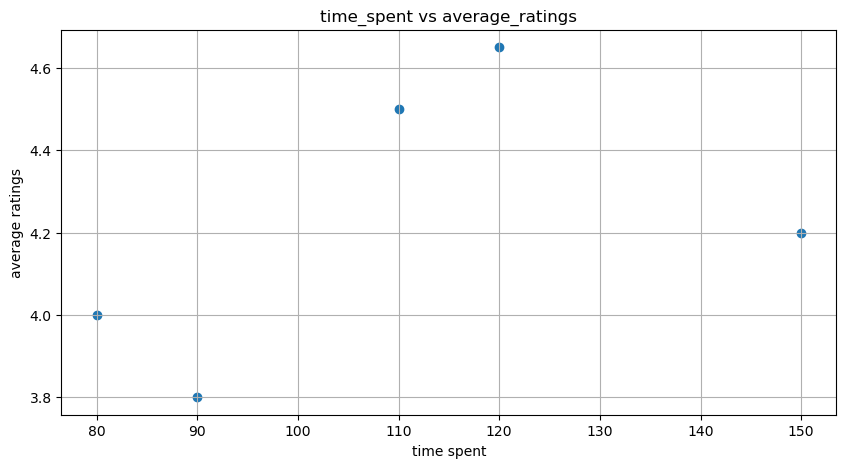

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(interactions_product.time_spent,interactions_product.average_ratings)
plt.title('time_spent vs average_ratings')
plt.xlabel('time spent')
plt.ylabel('average ratings')
plt.grid()
plt.show()

#### Disini terlihat bahwa pemilihan rating berdasarkan lama waktu yang user habiskan untuk mencari produk tidak linear. namun sebenarnya bila kita amati lebih lanjut grafik diatas bisa saja linear, namun terdapat outlier yaitu pada time_spent = 150. Kita akan coba untuk data yang lain

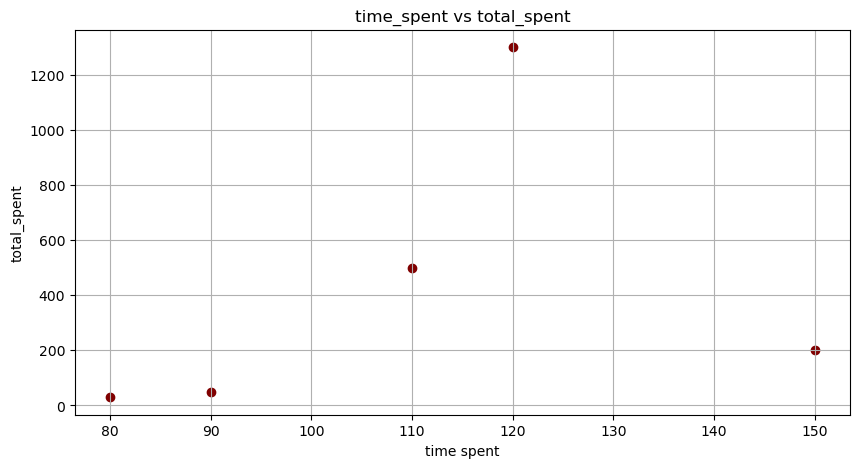

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(interactions_product.time_spent,interactions_product.total_spent,color="maroon")
plt.title('time_spent vs total_spent')
plt.xlabel('time spent')
plt.ylabel('total_spent')
plt.grid()
plt.show()

#### Disini dapat dilihat juga bahwa data pada time_spent 150 menjadi outlier 

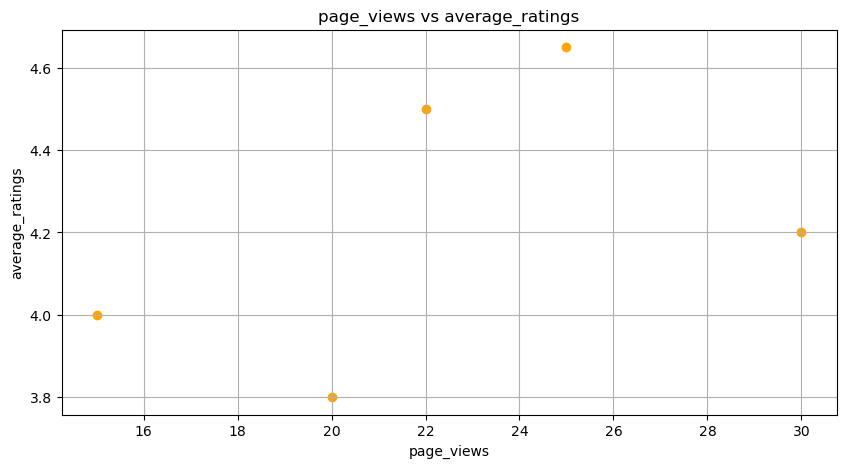

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(interactions_product.page_views,interactions_product.average_ratings,color="orange")
plt.title('page_views vs average_ratings')
plt.xlabel('page_views')
plt.ylabel('average_ratings')
plt.grid()
plt.show()

#### Disini dapat dilihat juga bahwa page_views 30 menjadi nilai outlier dari keseluruhan data. Kita coba cek dengan fitur total spent. 

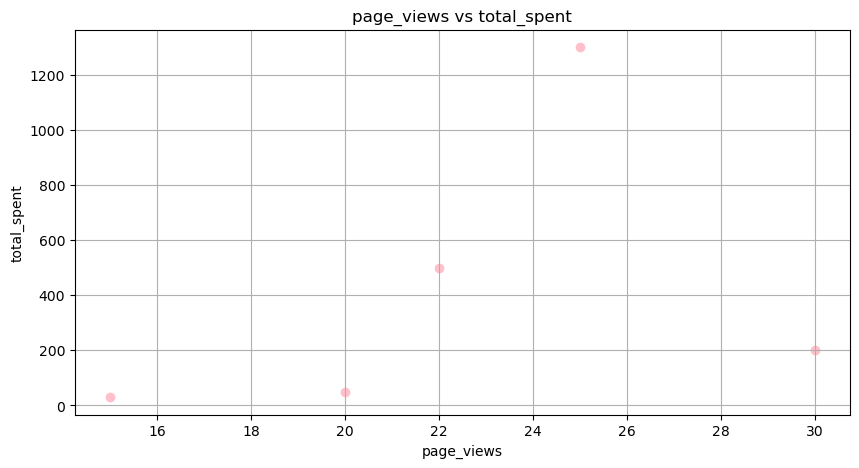

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(interactions_product.page_views,interactions_product.total_spent,color="pink")
plt.title('page_views vs total_spent')
plt.xlabel('page_views')
plt.ylabel('total_spent')
plt.grid()
plt.show()

#### ternyata hasilnya sama juga, dimana page_views 30 menjadi outlier pada grafik diatas  

kita akan cek apakah page_views 30 dan time_spent 150 dimiliki oleh user yang sama?

In [31]:
interactions_product[(interactions_product["time_spent"]==150) & (interactions_product["page_views"]==30)]

,customer_id,page_views,time_spent,average_ratings,total_spent
2,3,30,150,4.2,200


#### ternyata data ini dimiliki oleh customer nomer 3.  kita akan coba lihat nilai korelasi sebelum dan sesudah customer 3 dihapus

In [33]:
interactions_product.corr()

,customer_id,page_views,time_spent,average_ratings,total_spent
customer_id,1.000000,-0.310878,-0.173205,-0.045268,-0.484474
page_views,-0.310878,1.000000,0.979013,0.446492,0.368333
time_spent,-0.173205,0.979013,1.000000,0.483505,0.329783
average_ratings,-0.045268,0.446492,0.483505,1.000000,0.875350
total_spent,-0.484474,0.368333,0.329783,0.875350,1.000000


#### dapat dilihat jika korelasi antara page_views, time_spent terhadap total_spent dan average_ratings tidak linear 

In [34]:
interations_product_deleted = interactions_product[(interactions_product["time_spent"]!=150) & (interactions_product["page_views"]!=30)]

In [35]:
interations_product_deleted.corr()

,customer_id,page_views,time_spent,average_ratings,total_spent
customer_id,1.000000,-0.477809,-0.300000,-0.045320,-0.497626
page_views,-0.477809,1.000000,0.955619,0.743139,0.855280
time_spent,-0.300000,0.955619,1.000000,0.906403,0.918458
average_ratings,-0.045320,0.743139,0.906403,1.000000,0.888874
total_spent,-0.497626,0.855280,0.918458,0.888874,1.000000


#### disini kita dapat melihat, setelah kita menghapus customer_id =3, korelasi antara total_spent dan page_views terhadap total_spent dan average_ratings meningkan. Dengan demikian keputusan untuk menghapus custom_id = 2 adalah keputusan yang benar

### Feature engineeering product.
Disini karena kita tahu bahwa data produk kita sangat minim, selanjutnya kita akan mengenerate data produk untuk membuat data kita semakin kaya. Pada tabel produk, diketahui bahwa korelasi rating dan harga sangat tinggi. Kita akan manfaatkan ini untuk mengenerate beberapa produk. Selain itu, dari proses EDA diketahui juga bahwa produk dengan kategori electronic memiliki rata-rata harga tertinggi, disusul oleh Home & kitchen, clothing, dan beauty. Disini kita akan mengenerate produk dengan aturan sebagai berikut:

- Harga electronic akan di generate antara 500 (nilai terendah) hingga 800 (nilai tertinggi) dengan rata-rata nilai mendekati 650
- Harga Home & kitchen akan di generate antara 100 (nilai terendah) hingga 300(nilai tertinggi) dengan rata-rata nilai mendekati 200 
- Harga beauty akan di generate antara 10 (nilai terendah) hingga 100 (nilai tertinggi) dengan rata-rata nilai mendekati 30.
- Harga clothing akan di generate antara 10 (nilai terendah) hingga 100 (nilai tertinggi) dengan rata-rata nilai mendekati 50

Namun sebelum itu kita akan membuat sebuah model linear regresi untuk memprediksi ratings berdasarkan harga. Hal ini dilakukan karena korelasi yang tinggi antara kedua fitur ini. Selain itu pembuatan model juga memudahkan kita untuk mengenerate nilai

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
price_scaler = MinMaxScaler()
ratings_scaler = MinMaxScaler()
X = price_scaler.fit_transform(product.price.values.reshape(-1,1))
y = ratings_scaler.fit_transform(product.ratings.values.reshape(-1,1))
model_ratings_lr = LinearRegression()
model_ratings_lr.fit(X,y)

LinearRegression()

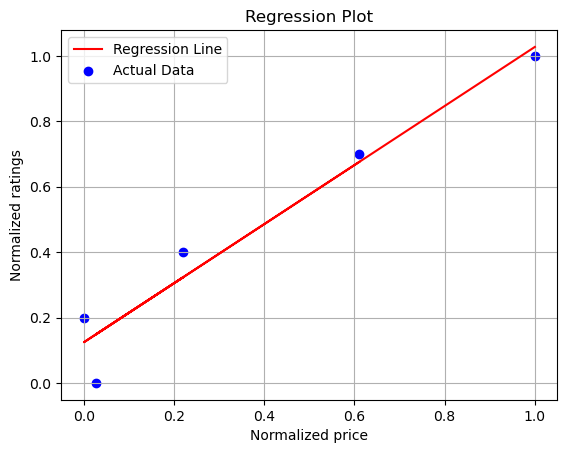

In [46]:
y_pred = model_ratings_lr.predict(X)
plt.plot(X,y_pred,color="red")
plt.scatter(X,y,color="blue")
plt.title("Regression Plot")
plt.xlabel("Normalized price")
plt.ylabel("Normalized ratings")
plt.grid()
plt.legend(["Regression Line","Actual Data"])
plt.show()

disini kita sudah dapat kan model untuk membantu kita mengenerate ratings berdasarkan harga

kita akan mengenerate 10 produk baru untuk tiap kategori

In [37]:
categories = ["Electronics","Clothing","Home & Kitchen","Beauty"]
categories_list = [item for item in categories for _ in range(10)]

In [54]:
import random
def generate_random_series(n:int, target_mean:int,min_val:int,max_val:int)->List[int]:
    series = [random.randint(min_val, max_val) for _ in range(n-1)]
    current_sum = sum(series)
    final_number = target_mean * n - current_sum
    if final_number < 1 or final_number > 100:
        return generate_random_series(n, target_mean,min_val,max_val)
    else:
        series.append(final_number)
    
    return series, sum(series) / n

In [67]:
price_list = []
n = 11
for c in categories:
    if c == "Electronics":
        target_mean = 650
        max_val = 800
        min_val = 500
    elif c=="Clothing":
        target_mean = 50
        max_val = 100
        min_val = 10
    elif c =="Home & Kitchen":
        target_mean = 200
        max_val = 300
        min_val = 100
    elif c =="Beauty":
        target_mean = 30
        max_val = 100
        min_val = 10
    prices = generate_random_series(n,target_mean,min_val,max_val)
    price_list.append(prices[0][:-1])

In [69]:
price_list=np.array(price_list)

In [72]:
price_list = price_list.flatten()

In [74]:
product_added = pd.DataFrame({
    "category":categories_list,
    "price":price_list
})

In [76]:
product_added.groupby("category")["price"].mean()

category
Beauty             30.6
Clothing           52.1
Electronics       706.3
Home & Kitchen    212.7
Name: price, dtype: float64

#### Nilai rata-rata category sudah cukup sesuai dengan ketentuan di awal. Selanjutnya akan dilakukan generate ratings dengan model linear regression

In [77]:
price_norm = price_scaler.transform(price_list.reshape(-1,1))
ratings = np.round(ratings_scaler.inverse_transform(model_ratings_lr.predict(price_norm)).flatten(),2)

In [78]:
ratings

array([4.8 , 4.72, 4.48, 4.69, 4.65, 4.77, 4.79, 4.66, 4.82, 4.79, 3.9 ,
       3.94, 3.99, 3.92, 3.94, 3.94, 3.98, 3.91, 3.99, 4.  , 4.06, 4.18,
       4.17, 4.08, 4.03, 4.09, 4.17, 4.24, 4.23, 4.15, 3.91, 3.91, 3.91,
       3.97, 3.95, 3.93, 3.94, 3.93, 3.91, 3.91])

In [79]:
product_added["ratings"] = ratings

In [86]:
product_added.insert(0,"product_id",np.arange(106,106+len(product_added)))

In [125]:
product_update = pd.concat([product,product_added],axis=0,ignore_index=True)

### Feature Engineering interactions
Disini selanjutnya akan dilakukan feature engineering untuk interactions. Dimana kita akan menambah jumlah user dan akan membuat sebuah model linear regression untuk memprediksi nilai page_views dari time_spent yang akan kita random.

In [94]:
interactions = interactions[interactions["customer_id"]!=3]

In [95]:
df_train_interactions = interactions.drop(columns=["customer_id"])
time_spent_scaler = MinMaxScaler()
page_view_scaler = MinMaxScaler()
X = time_spent_scaler.fit_transform(df_train_interactions.time_spent.values.reshape(-1,1))
y = page_view_scaler.fit_transform(df_train_interactions.page_views.values.reshape(-1,1))

In [96]:
from sklearn.linear_model import LinearRegression
model_page_lr = LinearRegression()
model_page_lr.fit(X,y)

LinearRegression()

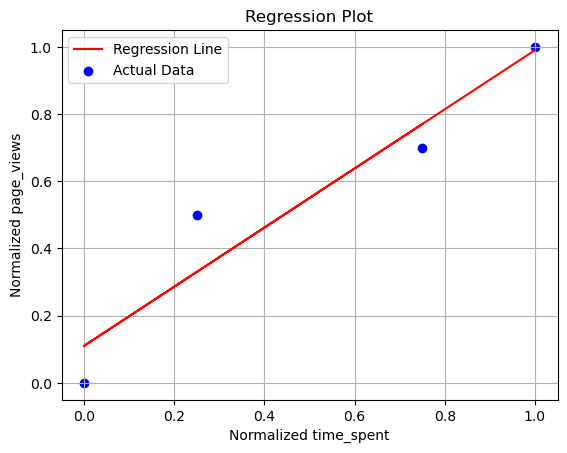

In [97]:
y_pred = model_page_lr.predict(X)
plt.plot(X,y_pred,color="red")
plt.scatter(X,y,color="blue")
plt.title("Regression Plot")
plt.xlabel("Normalized time_spent")
plt.ylabel("Normalized page_views")
plt.grid()
plt.legend(["Regression Line","Actual Data"])
plt.show()

#### Selanjutnya kita akan buat 100 user baru 

In [98]:
consumer_id = np.arange(6,106)

selanjutnya untuk time_spent kita generate secara random dengan range antara 50 hingga 150

In [159]:
time_spent = np.random.uniform(90,151,100)

In [160]:
time_spent = time_spent.astype(int)

In [161]:
time_spent_norm = time_spent_scaler.transform(time_spent.reshape(-1,1))
page_view_norm = model_page_lr.predict(time_spent_norm)
page_view = page_view_scaler.inverse_transform(page_view_norm).astype(int).flatten()

In [162]:
interactions_added = pd.DataFrame({
    "customer_id": consumer_id,
    "time_spent":time_spent,
    "page_views":page_view
})

In [163]:
interactions

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
3,4,15,80
4,5,22,110


In [164]:
interactions_updated = pd.concat([interactions,interactions_added],axis=0,ignore_index=True)

In [165]:
interactions_updated

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,4,15,80
3,5,22,110
4,6,22,111
...,...,...,...
99,101,23,112
100,102,30,144
101,103,19,96
102,104,23,115


### Membuat model linear regresi untuk mengenerate purchase data
Sebelumnya kita ketahui bahwa pada dataframe interactions product correlation antara time_spent dan average_ratings tinggi, selain itu korelasi antara time_spent dengan total_spent juga tinggi. Kita akan buat model linear regresi yang akan kita gunakan untuk mengenerate total_spent dari time_spent

In [126]:
interations_product_deleted.corr()

,customer_id,page_views,time_spent,average_ratings,total_spent
customer_id,1.000000,-0.477809,-0.300000,-0.045320,-0.497626
page_views,-0.477809,1.000000,0.955619,0.743139,0.855280
time_spent,-0.300000,0.955619,1.000000,0.906403,0.918458
average_ratings,-0.045320,0.743139,0.906403,1.000000,0.888874
total_spent,-0.497626,0.855280,0.918458,0.888874,1.000000


In [127]:
purchase_time_spent_scaler = MinMaxScaler()
purchase_total_spent_scaler = MinMaxScaler()

In [128]:
X = purchase_time_spent_scaler.fit_transform(interations_product_deleted.time_spent.values.reshape(-1,1))
y = purchase_total_spent_scaler.fit_transform(interations_product_deleted.total_spent.values.reshape(-1,1))
model_purchase_lr = LinearRegression()
model_purchase_lr.fit(X,y)

LinearRegression()

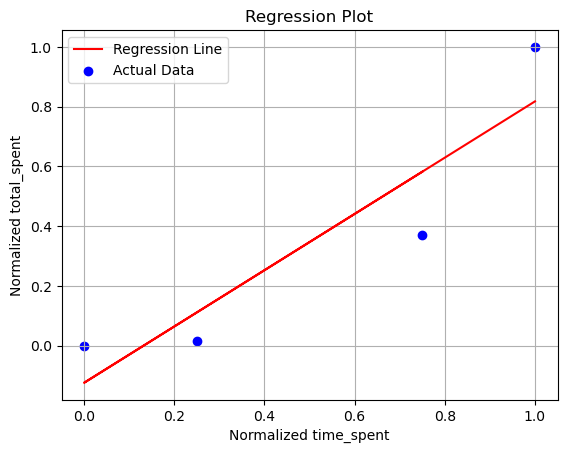

In [130]:
y_pred = model_purchase_lr.predict(X)
plt.plot(X,y_pred,color="red")
plt.scatter(X,y,color="blue")
plt.title("Regression Plot")
plt.xlabel("Normalized time_spent")
plt.ylabel("Normalized total_spent")
plt.grid()
plt.legend(["Regression Line","Actual Data"])
plt.show()

#### Selanjutnya kita akan menggunakan model ini untuk mengenerate dataset beberapa beberapa dataset pada purchase. Kita akan mencari total spent berdasarkan time_spent, yang kemudian kita akan buat sebuah metode untuk mencari sejumlah barang dengan jumlah barang tertentu dan total harga barang yang terprediksi oleh model ini. Kita akan hapus purchase date, karena kita tidak akan menganalisa time series. Selain itu kita akan hapus record customer_id = 3

In [132]:
purchase.drop(columns=["purchase_date"],inplace=True)
purchase = purchase[purchase["customer_id"]!=3]

In [133]:
purchase

,customer_id,product_id
0,1,101
1,1,105
2,2,102
4,4,104
5,5,101


In [135]:
product_update.to_csv("new.csv",index=False)

#### Kita akan buat fungsi untuk membuat pemilihan N product secara acak pada total harga T dan terdistribusi secara merata. Kita akan coba gunakan metode sederhana untuk menyelesaikan ini, sebenarnya permasalahan ini mirip seperti knapsack problem. Namun karena Terra Store akan pitching setelah makan siang, jadi mari kita coba pendekatan lainnya

In [184]:
def find_evenly_distributed_products_fixed(data:pd.DataFrame, n:int, total_price:int)->pd.DataFrame:
    average_price_per_item = total_price / n
    sorted_data = data.iloc[(data['price'] - average_price_per_item).abs().argsort()]
    selected_products = []
    current_total_price = 0
    
    for _, row in sorted_data.iterrows():
        if len(selected_products) < n and current_total_price + row['price'] <= total_price:
            selected_products.append(row)
            current_total_price += row['price']
            remaining_items = n - len(selected_products)
            if remaining_items > 0:
                average_price_per_item = (total_price - current_total_price) / remaining_items    
    return pd.DataFrame(selected_products) 



In [185]:
def generate_purchase(interactions:pd.DataFrame,product:pd.DataFrame)->pd.DataFrame:
    start_id = 6
    stop_id = 106
    customer_id = np.arange(start_id,stop_id)
    df_temp = interactions[interactions["customer_id"].isin(customer_id)]
    time_spent = df_temp["time_spent"].values
    time_spent_norm = purchase_time_spent_scaler.transform(time_spent.reshape(-1,1))
    total_spent_est = purchase_total_spent_scaler.inverse_transform(model_purchase_lr.predict(time_spent_norm)).flatten().astype(int)
    total_item = np.random.randint(2,9,size=100)
    df_list = []
    for total,n in zip(total_spent_est,total_item):
        product_list = find_evenly_distributed_products_fixed(product,n,total)
        df_list.append(product_list)
    df_list_selected = pd.concat(df_list,axis=0)
    customer_id_list = np.repeat(customer_id,total_item)
    purchase_df =pd.DataFrame({
        "customer_id":customer_id_list,
        "product_id": df_list_selected.product_id.values
    })
    return purchase_df
        
        
    
                                                           
    
        

In [186]:
purchase_added = generate_purchase(interactions_updated,product_update)

In [192]:
purchase_update = pd.concat([purchase,purchase_added],axis=0,ignore_index=True)

In [195]:
purchase_update

,customer_id,product_id
0,1,101
1,1,105
2,2,102
3,4,104
4,5,101
...,...,...
531,105,122
532,105,139
533,105,130
534,105,102


#### kita sudah buat purchase update, selanjutnya kita akan melakukan feature engineering lanjut pada data ini. Sebelumnya diketahui bahwa setiap produk memiliki rating, disini kita akan buat sistem rating pribadi pada setiap produk yang dibeli oleh user. Biasanya rating pada sebuah produk adalah rata-rata rating yang diterima oleh produk tersebut dari semua user. Dengan pertimbangan hal tersebut kita akan membuat sebuah metode untuk menentukan sebuah rating yang diberikan oleh user terhadap suatu produk. Disini kita akan gunakan pembobotan berdasarkan time_spent sebagai pembobotan. Hal ini dikarenakan kita tahu bahwa time_spent memiliki korelasi yang tinggi pada price dan price memiliki korelasi yang tinggi pada ratings. Dengan demikian kita akan buat pembobotan berdasarkan time_spent. Disini kita asumsikan bahwa user yang ada pada dataset saat ini adalah hanya sebagian user yang dimiliki oleh sistem

In [206]:
def round_to_half(number:np.ndarray)->np.ndarray:
    return np.round(number * 2) / 2

def user_ratings(product:pd.DataFrame,purchase:pd.DataFrame,interactions:pd.DataFrame)->pd.DataFrame:
    product_id = product["product_id"].unique()
    list_df = []
    for p in product_id:
        temp_df = purchase[purchase["product_id"]==p]
        temp_df = pd.merge(temp_df,interactions,on="customer_id")
        ratings = product[product["product_id"]==p]["ratings"].values[0]
        user_weight = temp_df["time_spent"].values
        total_weight=user_weight.sum()
        total_user = len(temp_df)
        total_ratings = ratings*total_user
        user_value = [(weight/total_weight)*total_ratings for weight in user_weight]
        clipped_value = np.clip(user_value,0,5)
        round_value = round_to_half(clipped_value)
        temp_df["user_ratings"]=round_value
        list_df.append(temp_df)
    result = pd.concat(list_df,axis=0)
    return result

In [207]:
new_purchase = user_ratings(product_update,purchase_update,interactions_updated)

In [208]:
new_purchase

,customer_id,product_id,page_views,time_spent,user_ratings
0,1,101,25,120,4.5
1,5,101,22,110,4.0
2,8,101,25,124,4.5
3,16,101,31,150,5.0
4,21,101,25,122,4.5
...,...,...,...,...,...
3,64,143,20,99,4.0
4,79,143,18,90,4.0
5,90,143,18,90,4.0
0,79,144,18,90,4.0


### SVD untuk Recommendation System
Selanjutnya kita akan membuat sebuah sistem kolaborasi filtering dengan menggunakan SVD. Singular Value Decomposition (SVD) adalah teknik faktorisasi matriks yang sangat penting dan serbaguna dalam aljabar linier, dan digunakan secara luas dalam berbagai aplikasi termasuk sistem rekomendasi. Dalam konteks sistem ini, SVD membantu dalam mengekstraksi dan mengidentifikasi fitur laten dari dataset rating customer terhadap product, yang kemudian dapat digunakan untuk memprediksi rating yang belum diketahui dan menghasilkan rekomendasi.

In [209]:
import surprise
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset

#### Disini data yang akan kita gunakan adalah customer id, product id dan user ratings. Kita tidak akan menggunakan data lainnya. Hal ini cukup memungkinkan mengingat data yang digunakan sekarang merupakan data hasil analisa dan korelasi beberapa fitur, sehingga bisa dikatakan bahwa data saat ini cukup untuk merepresentasikan seluruh data yang ada

In [210]:
reader = Reader()
data = Dataset.load_from_df(new_purchase[['customer_id','product_id','user_ratings']], reader)

#### kita akan split testset sebanyak 20% dari total data

In [212]:
trainset, testset = train_test_split(data, test_size=0.20, random_state=50)

In [213]:
algo_svd = SVD()
prediction_mf = algo_svd.fit(trainset).test(testset)

#### selanjutnya kita akan evaluasi nilai prediction_mf yang merupakan prediction rating dengan menggunakan MAE dan RMSE. MAE dan RMSE digunakan untuk melihat error ratings terhadap data aslinya. MAE merupakan nilai absolut sedangkan RMSE nilai ternormalisasi

In [215]:
accuracy.mae(prediction_mf)
accuracy.rmse(prediction_mf)

MAE:  0.2816
RMSE: 0.3589


0.3589385409317479

#### Nilai MAE dan RMSE yang kita dapatkan cukup kecil, sehingga kita dapat menggunakan model ini untuk memprediksi barang-barang apa saja yang bisa direkomendasikan ke user selanjutnya dan juga bisa juga digunakan untuk memprediksi barang apa saja yang akan dibeli oleh user selanjutnya

#### Kita akan test model ini untuk mendapatkan n-id product yang akan dibeli oleh user/yang akan kita rekomendasikan ke user. kita gunakan program get_top_n default dari library surprise

In [216]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [217]:
predictions = algo_svd.test(testset)
top_n = get_top_n(predictions, n=5)


In [218]:
top_n

defaultdict(list,
            {41: [(124, 4.148355750731253), (122, 3.922691209766551)],
             8: [(133, 3.996588856890319)],
             95: [(128, 4.156071195277627), (132, 4.048670653090994)],
             36: [(135, 4.243679641783151)],
             47: [(118, 4.0033958858384615), (129, 3.9880777813344266)],
             7: [(103, 4.131607514191155), (130, 3.8983177047155664)],
             99: [(128, 4.185320474606005), (132, 4.068330301306836)],
             83: [(124, 3.8961659597960283), (139, 3.7749351681407814)],
             38: [(134, 4.208542909210731)],
             82: [(103, 4.190723202478196),
              (130, 4.130866431916892),
              (128, 4.1296098183565455)],
             31: [(131, 3.8137681700534016)],
             26: [(133, 4.139694674700726)],
             68: [(126, 4.251105901578161)],
             81: [(134, 4.3247276311231255), (128, 4.1562171353064326)],
             45: [(135, 4.074585161052829)],
             84: [(130, 3.979640404692

#### data diatas adalah data rekomendasi produk terbaik / data produk yang akan dibeli oleh user selanjutnya untuk semua user. Karena hasil dari model ini cukup baik selajutnya kita akan menggunakan model ini untuk di run di website.

### Prepare data untuk website

selanjutnya kita akan melakukan prepare data untuk website

In [231]:
new_purchase.to_csv("new_purchase.csv",index=False)

kita akan buat fungsi untuk mengenerate uuid, karena pada website id yang digunakan adala UUID

In [225]:
import uuid
def generate_random_uuids(n):
    return [str(uuid.uuid4()) for _ in range(n)]
interactions_uuid = generate_random_uuids(len(interactions_updated))

In [227]:
interactions_updated.insert(0,"uuid",interactions_uuid)

In [229]:
interactions_updated

,uuid,customer_id,page_views,time_spent
0,7a68b3c5-0412-4a70-b6d7-e0ceca24cdd4,1,25,120
1,9d199c48-bea4-461f-8bcb-6e0d3614c568,2,20,90
2,b9cc262f-d476-4e63-b9a2-e36177eeea07,4,15,80
3,457f225f-9896-4174-9625-d6a559bf05d7,5,22,110
4,932499db-00c0-460e-bbf4-513df451df5b,6,22,111
...,...,...,...,...
99,46026f7e-9dab-47fd-93db-ea6b97bba75f,101,23,112
100,aeaaadc5-12cd-4330-804f-5abfd86bd128,102,30,144
101,141d82f8-fd2d-4a94-af03-74531047b3bc,103,19,96
102,1567f539-c198-41c6-98b0-2fe685cfe114,104,23,115


Kita juga akan mengenerate nama dan address karena pada website setiap user memiliki nama dan address

In [238]:
import faker
import random
fake = faker.Faker('en_US')


def generate_random_names_addresses(n):
    name = []
    address = []
    for _ in range(n):
        name.append(fake.name())
        address.append(fake.address().replace("\n"," "))
    return name,address

names,addresses = generate_random_names_addresses(len(interactions_updated))

In [241]:
interactions_updated["name"] = names
interactions_updated["address"] = addresses

In [244]:
interactions_updated.to_csv("new_interactions.csv",index=False)

selanjutnya kita akan siapkan product data, disini kita akan mengenerate uuid untuk setiap record juga

In [246]:
product_uuid = generate_random_uuids(len(product_update))

In [247]:
product_update.insert(0,"uuid",product_uuid)

Selanjutnya kita akan membuat beberapa nama product, pada website nama product digunakan untuk menjadi alias dari product id

In [251]:
product_name=[
    "TV","Shirt","Juicer","Lipstick","Computer","Speaker","Handphone","Vacum Cleaner","Mouse","Microphone","Fan","AC",
    "Monitor","Refrigerator","Printer","Pants","Jacket","Hat","Gloves","T-Shirt","Sandals","Shoes","Jeans","Socks","Bracelet",
    "Knife","Spoon","Fork","Plate","Stove","Pan","Frying Pan","Kettle","Cup","Bowl","Eyeliner","Skincare","Mascara","Liptint",
    "Parfume","Powder","Foundation","Concealor","BB Cream", "Blush On"
]

In [253]:
product_update["product_name"] = product_name

In [255]:
product_update.to_csv("new_product.csv")

In [256]:
new_purchase

,customer_id,product_id,page_views,time_spent,user_ratings
0,1,101,25,120,4.5
1,5,101,22,110,4.0
2,8,101,25,124,4.5
3,16,101,31,150,5.0
4,21,101,25,122,4.5
...,...,...,...,...,...
3,64,143,20,99,4.0
4,79,143,18,90,4.0
5,90,143,18,90,4.0
0,79,144,18,90,4.0
